In [170]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [171]:
!pip install sentencepiece

In [172]:
!pip install transformers[sentencepiece]

In [258]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
import sentencepiece

tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine")
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

print(nlp("Alad'2 est clairement le meilleur film de l'année 2018.")) # POSITIVE
print(nlp("Juste whoaaahouuu !")) # POSITIVE
print(nlp("NUL...A...CHIER ! FIN DE TRANSMISSION.")) # NEGATIVE
print(nlp("Je m'attendais à mieux de la part de Franck Dubosc !")) # NEGATIVE

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


[{'label': 'POSITIVE', 'score': 0.9657253623008728}]
[{'label': 'POSITIVE', 'score': 0.9862489104270935}]
[{'label': 'NEGATIVE', 'score': 0.9974060654640198}]
[{'label': 'NEGATIVE', 'score': 0.9956077933311462}]


In [175]:
import pandas as pd

In [176]:
#CLEAN AND LABEL MEN POLARITY

In [265]:
BVC2021_men = pd.read_excel('C:/Users/olivi/Documents/Ironhack/IRONLABS_OM/Bike mobility in Paris/Barometre villes cyclables/2021/Commentaires/commentaires_male_only.xlsx')

In [178]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [266]:
import string
from unidecode import unidecode

In [267]:
def clean_text(text ):
    text = str(text) 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    text2 = unidecode(text2)
    
    return text2.lower()

In [268]:
for i in range(len(BVC2021_men.texte)):
    clean_text(str(BVC2021_men.texte[i]))

In [269]:
BVC2021_men['clean'] = BVC2021_men.texte.apply(clean_text)

In [270]:
BVC2021_men.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,polarity,clean
0,75056,M,1,1,0,1,1,1,"- améliorer le revêtement des pistes cyclables (doit être sans défaut, plus roulant, plus lisse, plus plat)\n- renforcer la sécurité des aménagements aux croisements et traversées de place (qui créent de la discontinuité et une baisse du confort)\n- améliorer les double-sens cyclables (avec marquage au sol plus présent, plus visible, sur toute la longueur - au diable, les économies de peinture !!)\n- ajouter de la signalisation pour les cyclistes (feu avec compteur inversé des secondes avant le passage au vert)\n- plus d'arceaux pour garer son vélo en petit nombre mais plus nombreux devant les commerces, stations de métro et équipements publics\n- réaliser des rues où le vélo est prioritaire sur les véhicules motorisés (interdiction de dépasser)",NaN,ameliorer revetement pistes cyclables doit etre sans defaut plus roulant plus lisse plus plat renforcer securite amenagements croisements traversees place creent discontinuite baisse confort ameliorer doublesens cyclables avec marquage plus present plus visible toute longueur diable economies peinture ajouter signalisation pour cyclistes avec compteur inverse secondes avant passage vert plus darceaux pour garer velo petit nombre mais plus nombreux devant commerces stations metro equipements publics realiser rues velo prioritaire vehicules motorises interdiction depasser
1,75056,M,1,1,0,0,0,1,"- Besoin de pérenniser ""proprement"" les pistes Covid (clarifier les sens de circulation, effacer l'ancien marquage au sol etc.)\n- Besoin de sécuriser tous les ronds points / croisements sur le modèle de la place de Catalogne",NaN,besoin perenniser proprement pistes covid clarifier sens circulation effacer lancien marquage besoin securiser tous ronds points croisements modele place catalogne
2,75056,M,1,1,0,1,1,1,"- Bien que de plus en plus de pistes cyclables soient mises en place, elles sont parfois très mal étudiées pour un usage sécurisé.\n- Il est nécessaire qu'elles soient davantage identifiables par les piétons et véhicules motorisés.\n- L'état des routes est souvent catastrophiques pour l'usage du vélo. Pour les pistes cyclables, c'est guère mieux, entre flaques d'eau, tas de feuilles mortes, verres cassés...\n- Réduire les véhicules motorisés est très urgent, c'est une question de santé publique. D'autant plus avec l'essor du cyclisme, qui reste une activité physique et donc davantage sensible à la pollution.\n- Il est très dangereux de circuler à vélo à Paris à cause des automobilistes (qui pour beaucoup dévouent une haine ouverte aux cyclistes), ce qui freine beaucoup de personnes à se lancer dans ce mode de déplacement malgré leur envie.\n- Les vélos mis à ""disposition"" par des entreprises privées, sont un réel fléau. Il est tout à fait normal que les piétons de plaignent. Le ""service"" des Vélib' est guère mieux : Soit les stations sont remplies, soit elles sont vides. Et l'état des vélos est catastrophique.\n- Enfin, le vol de vélo incessant reste aussi un problème à résoudre...\n- Sinon c'est génial le vélo :)",NaN,bien plus plus pistes cyclables soient mises place elles sont parfois tres etudiees pour usage securise necessaire quelles soient davantage identifiables pietons vehicules motorises letat routes souvent catastrophiques pour lusage velo pour pistes cyclables cest guere mieux entre flaques deau feuilles mortes verres casses reduire vehicules motorises tres urgent cest question sante publique dautant plus avec lessor cyclisme reste activite physique donc davantage sensible pollution tres dangereux circuler velo paris cause automobilistes pour beaucoup devouent haine ouverte cyclistes freine beaucoup personnes lancer dans mode deplacement malgre leur envie velos disposition entreprises privees sont reel fleau tout fait normal pietons plaignent service velib guere mieux soit stations sont remplies soit elles sont vides letat velos catastrophique enfin velo incessant

In [271]:
BVC2021_men.tail()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,polarity,clean
2172,75056,M,1,1,0,0,0,2,"Votre questionnaire est focalisé sur les itinéraires cyclables. Il faudrait également aborder les axes plus secondaires, qui ne nécessitent pas d'aménagements cyclables particuliers (hors double-sens). Concernant ceux-ci (et aussi quelques axes plus importants), je ne comprends pas pourquoi autant de rues de Paris sont encore pavées, et souvent avec un uni déplorable (creux et bosses à gogo). On ne se sent pas très en sécurité question adhérence, et on est prié de ne rien transporter de fragile, sous peine de risquer de retrouver ses oeufs en omelette à l'arrivée...",NaN,votre questionnaire focalise itineraires cyclables faudrait egalement aborder axes plus secondaires necessitent damenagements cyclables particuliers hors doublesens concernant ceuxci aussi quelques axes plus importants comprends pourquoi autant rues paris sont encore pavees souvent avec deplorable creux bosses gogo sent tres securite question adherence prie rien transporter fragile sous peine risquer retrouver oeufs omelette larrivee
2173,75056,M,0,1,0,0,0,2,Vraiment appréhender ce qu'est un vélo et pas faire que de la politique sans suite,NaN,vraiment apprehender quest velo faire politique sans suite
2174,75056,M,1,1,0,1,0,1,vraiment séparer les pistes cyclables de la voirie. Mettre les pistes cyclables le plus possible derrière le stationnement des voitures par exemple. Faire respecter impérativement l'interdiction de stationner sur les pistes cyclables,NaN,vraiment separer pistes cyclables voirie mettre pistes cyclables plus possible derriere stationnement voitures exemple faire respecter imperativement linterdiction stationner pistes cyclables
2175,75056,M,1,1,0,1,1,1,Work in progress,NaN,work progress
2176,75056,M,1,0,0,1,1,2,Zone rouge noire Rue nationale de la porte d'ivry (maréchaux) ça roule à plus de 50 kms jamais de contrôle. Ne cède pas le passage piéton avant carrefour tolbiac. Accélération à fond pour le feu. Et fréquentation excessive de poids lourds. Zone noire : rue Tolbiac tout pareil,NaN,zone rouge noire nationale porte divry marechaux roule plus jamais controle cede passage pieton avant carrefour tolbiac acceleration fond pour frequentation excessive poids lourds zone noire tolbiac tout pareil


In [272]:
import numpy as np

In [273]:
BVC2021_men['polarity2'] = np.nan

In [274]:
# Model params
initializer_gain=1.0,  # Used in trainable variable initialization.
vocab_size=33945,  # Number of tokens defined in the vocabulary file.
hidden_size=512,  # Model dimension in the hidden layers.
num_hidden_layers=8,  # Number of layers in the encoder and decoder stacks.
num_heads=8,  # Number of heads to use in multi-headed attention.

In [276]:
for i in range(len(BVC2021_men.clean)):
    BVC2021_men.polarity2[i] = nlp(str(BVC2021_men.clean[i]))

C:\Users\olivi\AppData\Local\Temp\ipykernel_11760\3409904953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BVC2021_men.polarity2[i] = nlp(str(BVC2021_men.clean[i]))


In [277]:
BVC2021_men.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,polarity,clean,polarity2
0,75056,M,1,1,0,1,1,1,"- améliorer le revêtement des pistes cyclables (doit être sans défaut, plus roulant, plus lisse, plus plat)\n- renforcer la sécurité des aménagements aux croisements et traversées de place (qui créent de la discontinuité et une baisse du confort)\n- améliorer les double-sens cyclables (avec marquage au sol plus présent, plus visible, sur toute la longueur - au diable, les économies de peinture !!)\n- ajouter de la signalisation pour les cyclistes (feu avec compteur inversé des secondes avant le passage au vert)\n- plus d'arceaux pour garer son vélo en petit nombre mais plus nombreux devant les commerces, stations de métro et équipements publics\n- réaliser des rues où le vélo est prioritaire sur les véhicules motorisés (interdiction de dépasser)",NaN,ameliorer revetement pistes cyclables doit etre sans defaut plus roulant plus lisse plus plat renforcer securite amenagements croisements traversees place creent discontinuite baisse confort ameliorer doublesens cyclables avec marquage plus present plus visible toute longueur diable economies peinture ajouter signalisation pour cyclistes avec compteur inverse secondes avant passage vert plus darceaux pour garer velo petit nombre mais plus nombreux devant commerces stations metro equipements publics realiser rues velo prioritaire vehicules motorises interdiction depasser,"[{'label': 'POSITIVE', 'score': 0.71159428358078}]"
1,75056,M,1,1,0,0,0,1,"- Besoin de pérenniser ""proprement"" les pistes Covid (clarifier les sens de circulation, effacer l'ancien marquage au sol etc.)\n- Besoin de sécuriser tous les ronds points / croisements sur le modèle de la place de Catalogne",NaN,besoin perenniser proprement pistes covid clarifier sens circulation effacer lancien marquage besoin securiser tous ronds points croisements modele place catalogne,"[{'label': 'POSITIVE', 'score': 0.6573546528816223}]"
2,75056,M,1,1,0,1,1,1,"- Bien que de plus en plus de pistes cyclables soient mises en place, elles sont parfois très mal étudiées pour un usage sécurisé.\n- Il est nécessaire qu'elles soient davantage identifiables par les piétons et véhicules motorisés.\n- L'état des routes est souvent catastrophiques pour l'usage du vélo. Pour les pistes cyclables, c'est guère mieux, entre flaques d'eau, tas de feuilles mortes, verres cassés...\n- Réduire les véhicules motorisés est très urgent, c'est une question de santé publique. D'autant plus avec l'essor du cyclisme, qui reste une activité physique et donc davantage sensible à la pollution.\n- Il est très dangereux de circuler à vélo à Paris à cause des automobilistes (qui pour beaucoup dévouent une haine ouverte aux cyclistes), ce qui freine beaucoup de personnes à se lancer dans ce mode de déplacement malgré leur envie.\n- Les vélos mis à ""disposition"" par des entreprises privées, sont un réel fléau. Il est tout à fait normal que les piétons de plaignent. Le ""service"" des Vélib' est guère mieux : Soit les stations sont remplies, soit elles sont vides. Et l'état des vélos est catastrophique.\n- Enfin, le vol de vélo incessant reste aussi un problème à résoudre...\n- Sinon c'est génial le vélo :)",NaN,bien plus plus pistes cyclables soient mises place elles sont parfois tres etudiees pour usage securise necessaire quelles soient davantage identifiables pietons vehicules motorises letat routes souvent catastrophiques pour lusage velo pour pistes cyclables cest guere mieux entre flaques deau feuilles mortes verres casses reduire vehicules motorises tres urgent cest question sante publique dautant plus avec lessor cyclisme reste activite physique donc davantage sensible pollution tres dangereux circuler velo paris cause automobilistes pour beaucoup devouent haine ouverte cyclistes freine beaucoup personnes lancer dans mode deplacement malgre leur envie velos disposition entreprises privees sont reel fleau tout fait normal pietons plaignent servi

In [278]:
BVC2021_men.drop('polarity', axis=1, inplace=True)

In [279]:
x=pd.json_normalize(BVC2021_men['polarity2'])
x= pd.json_normalize(x[0])
x

,label,score
0,POSITIVE,0.711594
1,POSITIVE,0.657355
2,POSITIVE,0.829854
3,POSITIVE,0.605417
4,NEGATIVE,0.592558
...,...,...
2172,NEGATIVE,0.714865
2173,POSITIVE,0.794576
2174,NEGATIVE,0.776830
2175,POSITIVE,0.577581


In [280]:
BVC2021_men.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,clean,polarity2
0,75056,M,1,1,0,1,1,1,"- améliorer le revêtement des pistes cyclables (doit être sans défaut, plus roulant, plus lisse, plus plat)\n- renforcer la sécurité des aménagements aux croisements et traversées de place (qui créent de la discontinuité et une baisse du confort)\n- améliorer les double-sens cyclables (avec marquage au sol plus présent, plus visible, sur toute la longueur - au diable, les économies de peinture !!)\n- ajouter de la signalisation pour les cyclistes (feu avec compteur inversé des secondes avant le passage au vert)\n- plus d'arceaux pour garer son vélo en petit nombre mais plus nombreux devant les commerces, stations de métro et équipements publics\n- réaliser des rues où le vélo est prioritaire sur les véhicules motorisés (interdiction de dépasser)",ameliorer revetement pistes cyclables doit etre sans defaut plus roulant plus lisse plus plat renforcer securite amenagements croisements traversees place creent discontinuite baisse confort ameliorer doublesens cyclables avec marquage plus present plus visible toute longueur diable economies peinture ajouter signalisation pour cyclistes avec compteur inverse secondes avant passage vert plus darceaux pour garer velo petit nombre mais plus nombreux devant commerces stations metro equipements publics realiser rues velo prioritaire vehicules motorises interdiction depasser,"[{'label': 'POSITIVE', 'score': 0.71159428358078}]"
1,75056,M,1,1,0,0,0,1,"- Besoin de pérenniser ""proprement"" les pistes Covid (clarifier les sens de circulation, effacer l'ancien marquage au sol etc.)\n- Besoin de sécuriser tous les ronds points / croisements sur le modèle de la place de Catalogne",besoin perenniser proprement pistes covid clarifier sens circulation effacer lancien marquage besoin securiser tous ronds points croisements modele place catalogne,"[{'label': 'POSITIVE', 'score': 0.6573546528816223}]"
2,75056,M,1,1,0,1,1,1,"- Bien que de plus en plus de pistes cyclables soient mises en place, elles sont parfois très mal étudiées pour un usage sécurisé.\n- Il est nécessaire qu'elles soient davantage identifiables par les piétons et véhicules motorisés.\n- L'état des routes est souvent catastrophiques pour l'usage du vélo. Pour les pistes cyclables, c'est guère mieux, entre flaques d'eau, tas de feuilles mortes, verres cassés...\n- Réduire les véhicules motorisés est très urgent, c'est une question de santé publique. D'autant plus avec l'essor du cyclisme, qui reste une activité physique et donc davantage sensible à la pollution.\n- Il est très dangereux de circuler à vélo à Paris à cause des automobilistes (qui pour beaucoup dévouent une haine ouverte aux cyclistes), ce qui freine beaucoup de personnes à se lancer dans ce mode de déplacement malgré leur envie.\n- Les vélos mis à ""disposition"" par des entreprises privées, sont un réel fléau. Il est tout à fait normal que les piétons de plaignent. Le ""service"" des Vélib' est guère mieux : Soit les stations sont remplies, soit elles sont vides. Et l'état des vélos est catastrophique.\n- Enfin, le vol de vélo incessant reste aussi un problème à résoudre...\n- Sinon c'est génial le vélo :)",bien plus plus pistes cyclables soient mises place elles sont parfois tres etudiees pour usage securise necessaire quelles soient davantage identifiables pietons vehicules motorises letat routes souvent catastrophiques pour lusage velo pour pistes cyclables cest guere mieux entre flaques deau feuilles mortes verres casses reduire vehicules motorises tres urgent cest question sante publique dautant plus avec lessor cyclisme reste activite physique donc davantage sensible pollution tres dangereux circuler velo paris cause automobilistes pour beaucoup devouent haine ouverte cyclistes freine beaucoup personnes lancer dans mode deplacement malgre leur envie velos disposition entreprises privees sont reel fleau tout fait normal pietons plaignent service velib guere mieux 

In [281]:
BVC2021_men.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,clean,polarity2
0,75056,M,1,1,0,1,1,1,"- améliorer le revêtement des pistes cyclables (doit être sans défaut, plus roulant, plus lisse, plus plat)\n- renforcer la sécurité des aménagements aux croisements et traversées de place (qui créent de la discontinuité et une baisse du confort)\n- améliorer les double-sens cyclables (avec marquage au sol plus présent, plus visible, sur toute la longueur - au diable, les économies de peinture !!)\n- ajouter de la signalisation pour les cyclistes (feu avec compteur inversé des secondes avant le passage au vert)\n- plus d'arceaux pour garer son vélo en petit nombre mais plus nombreux devant les commerces, stations de métro et équipements publics\n- réaliser des rues où le vélo est prioritaire sur les véhicules motorisés (interdiction de dépasser)",ameliorer revetement pistes cyclables doit etre sans defaut plus roulant plus lisse plus plat renforcer securite amenagements croisements traversees place creent discontinuite baisse confort ameliorer doublesens cyclables avec marquage plus present plus visible toute longueur diable economies peinture ajouter signalisation pour cyclistes avec compteur inverse secondes avant passage vert plus darceaux pour garer velo petit nombre mais plus nombreux devant commerces stations metro equipements publics realiser rues velo prioritaire vehicules motorises interdiction depasser,"[{'label': 'POSITIVE', 'score': 0.71159428358078}]"
1,75056,M,1,1,0,0,0,1,"- Besoin de pérenniser ""proprement"" les pistes Covid (clarifier les sens de circulation, effacer l'ancien marquage au sol etc.)\n- Besoin de sécuriser tous les ronds points / croisements sur le modèle de la place de Catalogne",besoin perenniser proprement pistes covid clarifier sens circulation effacer lancien marquage besoin securiser tous ronds points croisements modele place catalogne,"[{'label': 'POSITIVE', 'score': 0.6573546528816223}]"
2,75056,M,1,1,0,1,1,1,"- Bien que de plus en plus de pistes cyclables soient mises en place, elles sont parfois très mal étudiées pour un usage sécurisé.\n- Il est nécessaire qu'elles soient davantage identifiables par les piétons et véhicules motorisés.\n- L'état des routes est souvent catastrophiques pour l'usage du vélo. Pour les pistes cyclables, c'est guère mieux, entre flaques d'eau, tas de feuilles mortes, verres cassés...\n- Réduire les véhicules motorisés est très urgent, c'est une question de santé publique. D'autant plus avec l'essor du cyclisme, qui reste une activité physique et donc davantage sensible à la pollution.\n- Il est très dangereux de circuler à vélo à Paris à cause des automobilistes (qui pour beaucoup dévouent une haine ouverte aux cyclistes), ce qui freine beaucoup de personnes à se lancer dans ce mode de déplacement malgré leur envie.\n- Les vélos mis à ""disposition"" par des entreprises privées, sont un réel fléau. Il est tout à fait normal que les piétons de plaignent. Le ""service"" des Vélib' est guère mieux : Soit les stations sont remplies, soit elles sont vides. Et l'état des vélos est catastrophique.\n- Enfin, le vol de vélo incessant reste aussi un problème à résoudre...\n- Sinon c'est génial le vélo :)",bien plus plus pistes cyclables soient mises place elles sont parfois tres etudiees pour usage securise necessaire quelles soient davantage identifiables pietons vehicules motorises letat routes souvent catastrophiques pour lusage velo pour pistes cyclables cest guere mieux entre flaques deau feuilles mortes verres casses reduire vehicules motorises tres urgent cest question sante publique dautant plus avec lessor cyclisme reste activite physique donc davantage sensible pollution tres dangereux circuler velo paris cause automobilistes pour beaucoup devouent haine ouverte cyclistes freine beaucoup personnes lancer dans mode deplacement malgre leur envie velos disposition entreprises privees sont reel fleau tout fait normal pietons plaignent service velib guere mieux 

In [282]:
BVC2021_men['polarity'] = BVC2021_men.polarity2

In [283]:
BVC2021_men.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,clean,polarity2,polarity
0,75056,M,1,1,0,1,1,1,"- améliorer le revêtement des pistes cyclables (doit être sans défaut, plus roulant, plus lisse, plus plat)\n- renforcer la sécurité des aménagements aux croisements et traversées de place (qui créent de la discontinuité et une baisse du confort)\n- améliorer les double-sens cyclables (avec marquage au sol plus présent, plus visible, sur toute la longueur - au diable, les économies de peinture !!)\n- ajouter de la signalisation pour les cyclistes (feu avec compteur inversé des secondes avant le passage au vert)\n- plus d'arceaux pour garer son vélo en petit nombre mais plus nombreux devant les commerces, stations de métro et équipements publics\n- réaliser des rues où le vélo est prioritaire sur les véhicules motorisés (interdiction de dépasser)",ameliorer revetement pistes cyclables doit etre sans defaut plus roulant plus lisse plus plat renforcer securite amenagements croisements traversees place creent discontinuite baisse confort ameliorer doublesens cyclables avec marquage plus present plus visible toute longueur diable economies peinture ajouter signalisation pour cyclistes avec compteur inverse secondes avant passage vert plus darceaux pour garer velo petit nombre mais plus nombreux devant commerces stations metro equipements publics realiser rues velo prioritaire vehicules motorises interdiction depasser,"[{'label': 'POSITIVE', 'score': 0.71159428358078}]","[{'label': 'POSITIVE', 'score': 0.71159428358078}]"
1,75056,M,1,1,0,0,0,1,"- Besoin de pérenniser ""proprement"" les pistes Covid (clarifier les sens de circulation, effacer l'ancien marquage au sol etc.)\n- Besoin de sécuriser tous les ronds points / croisements sur le modèle de la place de Catalogne",besoin perenniser proprement pistes covid clarifier sens circulation effacer lancien marquage besoin securiser tous ronds points croisements modele place catalogne,"[{'label': 'POSITIVE', 'score': 0.6573546528816223}]","[{'label': 'POSITIVE', 'score': 0.6573546528816223}]"
2,75056,M,1,1,0,1,1,1,"- Bien que de plus en plus de pistes cyclables soient mises en place, elles sont parfois très mal étudiées pour un usage sécurisé.\n- Il est nécessaire qu'elles soient davantage identifiables par les piétons et véhicules motorisés.\n- L'état des routes est souvent catastrophiques pour l'usage du vélo. Pour les pistes cyclables, c'est guère mieux, entre flaques d'eau, tas de feuilles mortes, verres cassés...\n- Réduire les véhicules motorisés est très urgent, c'est une question de santé publique. D'autant plus avec l'essor du cyclisme, qui reste une activité physique et donc davantage sensible à la pollution.\n- Il est très dangereux de circuler à vélo à Paris à cause des automobilistes (qui pour beaucoup dévouent une haine ouverte aux cyclistes), ce qui freine beaucoup de personnes à se lancer dans ce mode de déplacement malgré leur envie.\n- Les vélos mis à ""disposition"" par des entreprises privées, sont un réel fléau. Il est tout à fait normal que les piétons de plaignent. Le ""service"" des Vélib' est guère mieux : Soit les stations sont remplies, soit elles sont vides. Et l'état des vélos est catastrophique.\n- Enfin, le vol de vélo incessant reste aussi un problème à résoudre...\n- Sinon c'est génial le vélo :)",bien plus plus pistes cyclables soient mises place elles sont parfois tres etudiees pour usage securise necessaire quelles soient davantage identifiables pietons vehicules motorises letat routes souvent catastrophiques pour lusage velo pour pistes cyclables cest guere mieux entre flaques deau feuilles mortes verres casses reduire vehicules motorises tres urgent cest question sante publique dautant plus avec lessor cyclisme reste activite physique donc davantage sensible pollution tres dangereux circuler velo paris cause automobilistes pour beaucoup devouent haine ouverte cyclistes freine beaucoup personnes lancer dans mode deplacement malgre leur envi

In [284]:
BVC2021_men.drop('polarity2', axis=1, inplace=True)

In [285]:
x=pd.json_normalize(BVC2021_men['polarity'])
x= pd.json_normalize(x[0])
x

,label,score
0,POSITIVE,0.711594
1,POSITIVE,0.657355
2,POSITIVE,0.829854
3,POSITIVE,0.605417
4,NEGATIVE,0.592558
...,...,...
2172,NEGATIVE,0.714865
2173,POSITIVE,0.794576
2174,NEGATIVE,0.776830
2175,POSITIVE,0.577581


In [286]:
BVC2021_men = BVC2021_men.join(x)

In [287]:
BVC2021_men.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,clean,polarity,label,score
0,75056,M,1,1,0,1,1,1,"- améliorer le revêtement des pistes cyclables (doit être sans défaut, plus roulant, plus lisse, plus plat)\n- renforcer la sécurité des aménagements aux croisements et traversées de place (qui créent de la discontinuité et une baisse du confort)\n- améliorer les double-sens cyclables (avec marquage au sol plus présent, plus visible, sur toute la longueur - au diable, les économies de peinture !!)\n- ajouter de la signalisation pour les cyclistes (feu avec compteur inversé des secondes avant le passage au vert)\n- plus d'arceaux pour garer son vélo en petit nombre mais plus nombreux devant les commerces, stations de métro et équipements publics\n- réaliser des rues où le vélo est prioritaire sur les véhicules motorisés (interdiction de dépasser)",ameliorer revetement pistes cyclables doit etre sans defaut plus roulant plus lisse plus plat renforcer securite amenagements croisements traversees place creent discontinuite baisse confort ameliorer doublesens cyclables avec marquage plus present plus visible toute longueur diable economies peinture ajouter signalisation pour cyclistes avec compteur inverse secondes avant passage vert plus darceaux pour garer velo petit nombre mais plus nombreux devant commerces stations metro equipements publics realiser rues velo prioritaire vehicules motorises interdiction depasser,"[{'label': 'POSITIVE', 'score': 0.71159428358078}]",POSITIVE,0.711594
1,75056,M,1,1,0,0,0,1,"- Besoin de pérenniser ""proprement"" les pistes Covid (clarifier les sens de circulation, effacer l'ancien marquage au sol etc.)\n- Besoin de sécuriser tous les ronds points / croisements sur le modèle de la place de Catalogne",besoin perenniser proprement pistes covid clarifier sens circulation effacer lancien marquage besoin securiser tous ronds points croisements modele place catalogne,"[{'label': 'POSITIVE', 'score': 0.6573546528816223}]",POSITIVE,0.657355
2,75056,M,1,1,0,1,1,1,"- Bien que de plus en plus de pistes cyclables soient mises en place, elles sont parfois très mal étudiées pour un usage sécurisé.\n- Il est nécessaire qu'elles soient davantage identifiables par les piétons et véhicules motorisés.\n- L'état des routes est souvent catastrophiques pour l'usage du vélo. Pour les pistes cyclables, c'est guère mieux, entre flaques d'eau, tas de feuilles mortes, verres cassés...\n- Réduire les véhicules motorisés est très urgent, c'est une question de santé publique. D'autant plus avec l'essor du cyclisme, qui reste une activité physique et donc davantage sensible à la pollution.\n- Il est très dangereux de circuler à vélo à Paris à cause des automobilistes (qui pour beaucoup dévouent une haine ouverte aux cyclistes), ce qui freine beaucoup de personnes à se lancer dans ce mode de déplacement malgré leur envie.\n- Les vélos mis à ""disposition"" par des entreprises privées, sont un réel fléau. Il est tout à fait normal que les piétons de plaignent. Le ""service"" des Vélib' est guère mieux : Soit les stations sont remplies, soit elles sont vides. Et l'état des vélos est catastrophique.\n- Enfin, le vol de vélo incessant reste aussi un problème à résoudre...\n- Sinon c'est génial le vélo :)",bien plus plus pistes cyclables soient mises place elles sont parfois tres etudiees pour usage securise necessaire quelles soient davantage identifiables pietons vehicules motorises letat routes souvent catastrophiques pour lusage velo pour pistes cyclables cest guere mieux entre flaques deau feuilles mortes verres casses reduire vehicules motorises tres urgent cest question sante publique dautant plus avec lessor cyclisme reste activite physique donc davantage sensible pollution tres dangereux circuler velo paris cause automobilistes pour beaucoup devouent haine ouverte cyclistes freine beaucoup personnes lancer dans mode deplacement malgre leur envie velos disposition entreprises privees sont reel fleau tout fait norm

In [288]:
BVC2021_men.drop('polarity', axis=1, inplace=True)

In [289]:
BVC2021_men.rename(columns = {'label': 'polarity'}, inplace=True)


In [290]:
BVC2021_men.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,clean,polarity,score
0,75056,M,1,1,0,1,1,1,"- améliorer le revêtement des pistes cyclables (doit être sans défaut, plus roulant, plus lisse, plus plat)\n- renforcer la sécurité des aménagements aux croisements et traversées de place (qui créent de la discontinuité et une baisse du confort)\n- améliorer les double-sens cyclables (avec marquage au sol plus présent, plus visible, sur toute la longueur - au diable, les économies de peinture !!)\n- ajouter de la signalisation pour les cyclistes (feu avec compteur inversé des secondes avant le passage au vert)\n- plus d'arceaux pour garer son vélo en petit nombre mais plus nombreux devant les commerces, stations de métro et équipements publics\n- réaliser des rues où le vélo est prioritaire sur les véhicules motorisés (interdiction de dépasser)",ameliorer revetement pistes cyclables doit etre sans defaut plus roulant plus lisse plus plat renforcer securite amenagements croisements traversees place creent discontinuite baisse confort ameliorer doublesens cyclables avec marquage plus present plus visible toute longueur diable economies peinture ajouter signalisation pour cyclistes avec compteur inverse secondes avant passage vert plus darceaux pour garer velo petit nombre mais plus nombreux devant commerces stations metro equipements publics realiser rues velo prioritaire vehicules motorises interdiction depasser,POSITIVE,0.711594
1,75056,M,1,1,0,0,0,1,"- Besoin de pérenniser ""proprement"" les pistes Covid (clarifier les sens de circulation, effacer l'ancien marquage au sol etc.)\n- Besoin de sécuriser tous les ronds points / croisements sur le modèle de la place de Catalogne",besoin perenniser proprement pistes covid clarifier sens circulation effacer lancien marquage besoin securiser tous ronds points croisements modele place catalogne,POSITIVE,0.657355
2,75056,M,1,1,0,1,1,1,"- Bien que de plus en plus de pistes cyclables soient mises en place, elles sont parfois très mal étudiées pour un usage sécurisé.\n- Il est nécessaire qu'elles soient davantage identifiables par les piétons et véhicules motorisés.\n- L'état des routes est souvent catastrophiques pour l'usage du vélo. Pour les pistes cyclables, c'est guère mieux, entre flaques d'eau, tas de feuilles mortes, verres cassés...\n- Réduire les véhicules motorisés est très urgent, c'est une question de santé publique. D'autant plus avec l'essor du cyclisme, qui reste une activité physique et donc davantage sensible à la pollution.\n- Il est très dangereux de circuler à vélo à Paris à cause des automobilistes (qui pour beaucoup dévouent une haine ouverte aux cyclistes), ce qui freine beaucoup de personnes à se lancer dans ce mode de déplacement malgré leur envie.\n- Les vélos mis à ""disposition"" par des entreprises privées, sont un réel fléau. Il est tout à fait normal que les piétons de plaignent. Le ""service"" des Vélib' est guère mieux : Soit les stations sont remplies, soit elles sont vides. Et l'état des vélos est catastrophique.\n- Enfin, le vol de vélo incessant reste aussi un problème à résoudre...\n- Sinon c'est génial le vélo :)",bien plus plus pistes cyclables soient mises place elles sont parfois tres etudiees pour usage securise necessaire quelles soient davantage identifiables pietons vehicules motorises letat routes souvent catastrophiques pour lusage velo pour pistes cyclables cest guere mieux entre flaques deau feuilles mortes verres casses reduire vehicules motorises tres urgent cest question sante publique dautant plus avec lessor cyclisme reste activite physique donc davantage sensible pollution tres dangereux circuler velo paris cause automobilistes pour beaucoup devouent haine ouverte cyclistes freine beaucoup personnes lancer dans mode deplacement malgre leur envie velos disposition entreprises privees sont reel fleau tout fait normal pietons plaignent service velib guere mieux soit stations sont remplies soit elles sont vides letat velos catas

In [291]:
BVC2021_men.tail()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,clean,polarity,score
2172,75056,M,1,1,0,0,0,2,"Votre questionnaire est focalisé sur les itinéraires cyclables. Il faudrait également aborder les axes plus secondaires, qui ne nécessitent pas d'aménagements cyclables particuliers (hors double-sens). Concernant ceux-ci (et aussi quelques axes plus importants), je ne comprends pas pourquoi autant de rues de Paris sont encore pavées, et souvent avec un uni déplorable (creux et bosses à gogo). On ne se sent pas très en sécurité question adhérence, et on est prié de ne rien transporter de fragile, sous peine de risquer de retrouver ses oeufs en omelette à l'arrivée...",votre questionnaire focalise itineraires cyclables faudrait egalement aborder axes plus secondaires necessitent damenagements cyclables particuliers hors doublesens concernant ceuxci aussi quelques axes plus importants comprends pourquoi autant rues paris sont encore pavees souvent avec deplorable creux bosses gogo sent tres securite question adherence prie rien transporter fragile sous peine risquer retrouver oeufs omelette larrivee,NEGATIVE,0.714865
2173,75056,M,0,1,0,0,0,2,Vraiment appréhender ce qu'est un vélo et pas faire que de la politique sans suite,vraiment apprehender quest velo faire politique sans suite,POSITIVE,0.794576
2174,75056,M,1,1,0,1,0,1,vraiment séparer les pistes cyclables de la voirie. Mettre les pistes cyclables le plus possible derrière le stationnement des voitures par exemple. Faire respecter impérativement l'interdiction de stationner sur les pistes cyclables,vraiment separer pistes cyclables voirie mettre pistes cyclables plus possible derriere stationnement voitures exemple faire respecter imperativement linterdiction stationner pistes cyclables,NEGATIVE,0.776830
2175,75056,M,1,1,0,1,1,1,Work in progress,work progress,POSITIVE,0.577581
2176,75056,M,1,0,0,1,1,2,Zone rouge noire Rue nationale de la porte d'ivry (maréchaux) ça roule à plus de 50 kms jamais de contrôle. Ne cède pas le passage piéton avant carrefour tolbiac. Accélération à fond pour le feu. Et fréquentation excessive de poids lourds. Zone noire : rue Tolbiac tout pareil,zone rouge noire nationale porte divry marechaux roule plus jamais controle cede passage pieton avant carrefour tolbiac acceleration fond pour frequentation excessive poids lourds zone noire tolbiac tout pareil,NEGATIVE,0.923382


In [292]:
BVC2021_men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   insee       2177 non-null   int64  
 1   sexe        2177 non-null   object 
 2   travail     2177 non-null   int64  
 3   utilitaire  2177 non-null   int64  
 4   enfants     2177 non-null   int64  
 5   tourisme    2177 non-null   int64  
 6   sport       2177 non-null   int64  
 7   freq        2177 non-null   int64  
 8   texte       2176 non-null   object 
 9   clean       2177 non-null   object 
 10  polarity    2177 non-null   object 
 11  score       2177 non-null   float64
dtypes: float64(1), int64(7), object(4)
memory usage: 204.2+ KB


In [293]:
BVC2021_men.groupby('polarity')['score'].count()

polarity
NEGATIVE    1284
POSITIVE     893
Name: score, dtype: int64

In [294]:
BVC2021_men.groupby('polarity')['score'].mean()

polarity
NEGATIVE    0.765585
POSITIVE    0.696429
Name: score, dtype: float64

In [295]:
BVC2021_men.to_csv(r'C:/Users/olivi/Documents/Ironhack/IRONLABS_OM/Bike mobility in Paris/Barometre villes cyclables/2021/male_with_polarity.csv', sep=";", index = None, header=True, encoding = 'utf-8-sig')

In [ ]:
#CLEAN AND LABEL WOMEN POLARITY

In [321]:
BVC2021_women = pd.read_excel('C:/Users/olivi/Documents/Ironhack/IRONLABS_OM/Bike mobility in Paris/Barometre villes cyclables/2021/Commentaires/commentaires_female_only.xlsx')

In [322]:
BVC2021_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   insee       1682 non-null   int64  
 1   sexe        1682 non-null   object 
 2   travail     1682 non-null   int64  
 3   utilitaire  1682 non-null   int64  
 4   enfants     1682 non-null   int64  
 5   tourisme    1682 non-null   int64  
 6   sport       1682 non-null   int64  
 7   freq        1682 non-null   int64  
 8   texte       1681 non-null   object 
 9   polarity    0 non-null      float64
dtypes: float64(1), int64(7), object(2)
memory usage: 131.5+ KB


In [323]:
for i in range(len(BVC2021_women.texte)):
    clean_text(str(BVC2021_women.texte[i]))

In [325]:
BVC2021_women.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,polarity
0,75056,F,1,1,1,0,0,1,"Il serait bon de signaler, au sol, les pistes cyclables par une couleur visible qui trancherait avec la route ou les trottoirs. Cela ferait de grands couloirs colorés qui seraient visibles par tous, y compris par les cyclistes !",NaN
1,75056,F,1,1,0,1,1,1,Pour moi le vélo en libre service a accentué les incivilités et les usagers ne sont ni respectueux du matériel ni du code de la route. Je ne veux pas que mes impôts servent à cela .,NaN
2,75056,F,1,1,0,1,0,1,Les difficultés rencontrées par les cyclistes sont plus liées à l'absence de civisme et à l'incompétence des néo cyclistes et des usagers de vélos en location qu'à la qualité des pistes cyclables dont les logiques d'utilisation laissent par ailleurs à désirer ( tout est fait pour que les néo cyclistes se sentent en situation d'impunité).,NaN
3,75056,F,1,1,0,1,0,1,"A Paris, il y a maintenant énormément de voies cyclables mais leur qualité est très variable (pavés, caniveau dangereux). Très peu de feux tricolores pour les vélos. Les voies cyclables passent de gauche à droite et vice-versa sans que la signalisation soit claire. On se demande parfois où on doit rouler. Certains cyclistes/trotinettes roulent sans lumière (et sans casque) - on ne les voit qu'au dernier moment, c'est très dangereux.",NaN
4,75056,F,1,1,0,1,0,1,"Règlementer est une chose. Faire appliquer la réglementation est inexistante ! Les 30 km ne sont pas appliqué, les feux grillés par vélos et trotinettes monnaie courante sans verbalisation possible. Quant au piétons ils peuvent faire ce qu'ils veulent et ne seront pas inquiétés. On peut faire passer toutes les lois et réglementations du monde si il n'y a pas de moyen pour les faire appliquer autant ne rien faire. Bien sûr qd je suis automobiliste je râle après les vélos qui font n'importe quoi et l'inverse est vrai !",NaN


In [326]:
BVC2021_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   insee       1682 non-null   int64  
 1   sexe        1682 non-null   object 
 2   travail     1682 non-null   int64  
 3   utilitaire  1682 non-null   int64  
 4   enfants     1682 non-null   int64  
 5   tourisme    1682 non-null   int64  
 6   sport       1682 non-null   int64  
 7   freq        1682 non-null   int64  
 8   texte       1681 non-null   object 
 9   polarity    0 non-null      float64
dtypes: float64(1), int64(7), object(2)
memory usage: 131.5+ KB


In [327]:
BVC2021_women['clean'] = BVC2021_women['texte'].apply(clean_text)

In [328]:
BVC2021_women.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,polarity,clean
0,75056,F,1,1,1,0,0,1,"Il serait bon de signaler, au sol, les pistes cyclables par une couleur visible qui trancherait avec la route ou les trottoirs. Cela ferait de grands couloirs colorés qui seraient visibles par tous, y compris par les cyclistes !",NaN,serait signaler pistes cyclables couleur visible trancherait avec route trottoirs cela ferait grands couloirs colores seraient visibles tous compris cyclistes
1,75056,F,1,1,0,1,1,1,Pour moi le vélo en libre service a accentué les incivilités et les usagers ne sont ni respectueux du matériel ni du code de la route. Je ne veux pas que mes impôts servent à cela .,NaN,pour velo libre service accentue incivilites usagers sont respectueux materiel code route veux impots servent cela
2,75056,F,1,1,0,1,0,1,Les difficultés rencontrées par les cyclistes sont plus liées à l'absence de civisme et à l'incompétence des néo cyclistes et des usagers de vélos en location qu'à la qualité des pistes cyclables dont les logiques d'utilisation laissent par ailleurs à désirer ( tout est fait pour que les néo cyclistes se sentent en situation d'impunité).,NaN,difficultes rencontrees cyclistes sont plus liees labsence civisme lincompetence cyclistes usagers velos location qualite pistes cyclables dont logiques dutilisation laissent ailleurs desirer tout fait pour cyclistes sentent situation dimpunite
3,75056,F,1,1,0,1,0,1,"A Paris, il y a maintenant énormément de voies cyclables mais leur qualité est très variable (pavés, caniveau dangereux). Très peu de feux tricolores pour les vélos. Les voies cyclables passent de gauche à droite et vice-versa sans que la signalisation soit claire. On se demande parfois où on doit rouler. Certains cyclistes/trotinettes roulent sans lumière (et sans casque) - on ne les voit qu'au dernier moment, c'est très dangereux.",NaN,paris maintenant enormement voies cyclables mais leur qualite tres variable paves caniveau dangereux tres feux tricolores pour velos voies cyclables passent gauche droite viceversa sans signalisation soit claire demande parfois doit rouler certains cyclistestrotinettes roulent sans lumiere sans casque voit quau dernier moment cest tres dangereux
4,75056,F,1,1,0,1,0,1,"Règlementer est une chose. Faire appliquer la réglementation est inexistante ! Les 30 km ne sont pas appliqué, les feux grillés par vélos et trotinettes monnaie courante sans verbalisation possible. Quant au piétons ils peuvent faire ce qu'ils veulent et ne seront pas inquiétés. On peut faire passer toutes les lois et réglementations du monde si il n'y a pas de moyen pour les faire appliquer autant ne rien faire. Bien sûr qd je suis automobiliste je râle après les vélos qui font n'importe quoi et l'inverse est vrai !",NaN,reglementer chose faire appliquer reglementation inexistante sont applique feux grilles velos trotinettes monnaie courante sans verbalisation possible quant pietons peuvent faire quils veulent seront inquietes peut faire passer toutes lois reglementations monde moyen pour faire appliquer autant rien faire bien suis automobiliste rale apres velos font nimporte quoi linverse vrai


In [329]:
BVC2021_women.polarity = BVC2021_women.clean.apply(nlp)

In [330]:
BVC2021_women.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,polarity,clean
0,75056,F,1,1,1,0,0,1,"Il serait bon de signaler, au sol, les pistes cyclables par une couleur visible qui trancherait avec la route ou les trottoirs. Cela ferait de grands couloirs colorés qui seraient visibles par tous, y compris par les cyclistes !","[{'label': 'NEGATIVE', 'score': 0.6007663011550903}]",serait signaler pistes cyclables couleur visible trancherait avec route trottoirs cela ferait grands couloirs colores seraient visibles tous compris cyclistes
1,75056,F,1,1,0,1,1,1,Pour moi le vélo en libre service a accentué les incivilités et les usagers ne sont ni respectueux du matériel ni du code de la route. Je ne veux pas que mes impôts servent à cela .,"[{'label': 'POSITIVE', 'score': 0.5182247161865234}]",pour velo libre service accentue incivilites usagers sont respectueux materiel code route veux impots servent cela
2,75056,F,1,1,0,1,0,1,Les difficultés rencontrées par les cyclistes sont plus liées à l'absence de civisme et à l'incompétence des néo cyclistes et des usagers de vélos en location qu'à la qualité des pistes cyclables dont les logiques d'utilisation laissent par ailleurs à désirer ( tout est fait pour que les néo cyclistes se sentent en situation d'impunité).,"[{'label': 'NEGATIVE', 'score': 0.8549526929855347}]",difficultes rencontrees cyclistes sont plus liees labsence civisme lincompetence cyclistes usagers velos location qualite pistes cyclables dont logiques dutilisation laissent ailleurs desirer tout fait pour cyclistes sentent situation dimpunite
3,75056,F,1,1,0,1,0,1,"A Paris, il y a maintenant énormément de voies cyclables mais leur qualité est très variable (pavés, caniveau dangereux). Très peu de feux tricolores pour les vélos. Les voies cyclables passent de gauche à droite et vice-versa sans que la signalisation soit claire. On se demande parfois où on doit rouler. Certains cyclistes/trotinettes roulent sans lumière (et sans casque) - on ne les voit qu'au dernier moment, c'est très dangereux.","[{'label': 'NEGATIVE', 'score': 0.7003509402275085}]",paris maintenant enormement voies cyclables mais leur qualite tres variable paves caniveau dangereux tres feux tricolores pour velos voies cyclables passent gauche droite viceversa sans signalisation soit claire demande parfois doit rouler certains cyclistestrotinettes roulent sans lumiere sans casque voit quau dernier moment cest tres dangereux
4,75056,F,1,1,0,1,0,1,"Règlementer est une chose. Faire appliquer la réglementation est inexistante ! Les 30 km ne sont pas appliqué, les feux grillés par vélos et trotinettes monnaie courante sans verbalisation possible. Quant au piétons ils peuvent faire ce qu'ils veulent et ne seront pas inquiétés. On peut faire passer toutes les lois et réglementations du monde si il n'y a pas de moyen pour les faire appliquer autant ne rien faire. Bien sûr qd je suis automobiliste je râle après les vélos qui font n'importe quoi et l'inverse est vrai !","[{'label': 'NEGATIVE', 'score': 0.8954683542251587}]",reglementer chose faire appliquer reglementation inexistante sont applique feux grilles velos trotinettes monnaie courante sans verbalisation possible quant pietons peuvent faire quils veulent seront inquietes peut faire passer toutes lois reglementations monde moyen pour faire appliquer autant rien faire bien suis automobiliste rale apres velos font nimporte quoi linverse vrai


In [331]:
BVC2021_women.polarity.value_counts()

[{'label': 'POSITIVE', 'score': 0.5280919671058655}]    14
[{'label': 'POSITIVE', 'score': 0.6118640899658203}]     2
[{'label': 'NEGATIVE', 'score': 0.9750326871871948}]     1
[{'label': 'NEGATIVE', 'score': 0.5283167958259583}]     1
[{'label': 'NEGATIVE', 'score': 0.6056593656539917}]     1
                                                        ..
[{'label': 'NEGATIVE', 'score': 0.6506205201148987}]     1
[{'label': 'NEGATIVE', 'score': 0.6908199787139893}]     1
[{'label': 'NEGATIVE', 'score': 0.5823540091514587}]     1
[{'label': 'POSITIVE', 'score': 0.8043102025985718}]     1
[{'label': 'NEGATIVE', 'score': 0.8008015751838684}]     1
Name: polarity, Length: 1668, dtype: int64

In [332]:
BVC2021_women.polarity.isna().sum()

0

In [333]:
BVC2021_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   insee       1682 non-null   int64 
 1   sexe        1682 non-null   object
 2   travail     1682 non-null   int64 
 3   utilitaire  1682 non-null   int64 
 4   enfants     1682 non-null   int64 
 5   tourisme    1682 non-null   int64 
 6   sport       1682 non-null   int64 
 7   freq        1682 non-null   int64 
 8   texte       1681 non-null   object
 9   polarity    1682 non-null   object
 10  clean       1682 non-null   object
dtypes: int64(7), object(4)
memory usage: 144.7+ KB


In [334]:
BVC2021_women['polarity2']= np.nan

In [336]:
BVC2021_women['polarity2']= BVC2021_women['polarity']

In [337]:
BVC2021_women.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,polarity,clean,polarity2
0,75056,F,1,1,1,0,0,1,"Il serait bon de signaler, au sol, les pistes cyclables par une couleur visible qui trancherait avec la route ou les trottoirs. Cela ferait de grands couloirs colorés qui seraient visibles par tous, y compris par les cyclistes !","[{'label': 'NEGATIVE', 'score': 0.6007663011550903}]",serait signaler pistes cyclables couleur visible trancherait avec route trottoirs cela ferait grands couloirs colores seraient visibles tous compris cyclistes,"[{'label': 'NEGATIVE', 'score': 0.6007663011550903}]"
1,75056,F,1,1,0,1,1,1,Pour moi le vélo en libre service a accentué les incivilités et les usagers ne sont ni respectueux du matériel ni du code de la route. Je ne veux pas que mes impôts servent à cela .,"[{'label': 'POSITIVE', 'score': 0.5182247161865234}]",pour velo libre service accentue incivilites usagers sont respectueux materiel code route veux impots servent cela,"[{'label': 'POSITIVE', 'score': 0.5182247161865234}]"
2,75056,F,1,1,0,1,0,1,Les difficultés rencontrées par les cyclistes sont plus liées à l'absence de civisme et à l'incompétence des néo cyclistes et des usagers de vélos en location qu'à la qualité des pistes cyclables dont les logiques d'utilisation laissent par ailleurs à désirer ( tout est fait pour que les néo cyclistes se sentent en situation d'impunité).,"[{'label': 'NEGATIVE', 'score': 0.8549526929855347}]",difficultes rencontrees cyclistes sont plus liees labsence civisme lincompetence cyclistes usagers velos location qualite pistes cyclables dont logiques dutilisation laissent ailleurs desirer tout fait pour cyclistes sentent situation dimpunite,"[{'label': 'NEGATIVE', 'score': 0.8549526929855347}]"
3,75056,F,1,1,0,1,0,1,"A Paris, il y a maintenant énormément de voies cyclables mais leur qualité est très variable (pavés, caniveau dangereux). Très peu de feux tricolores pour les vélos. Les voies cyclables passent de gauche à droite et vice-versa sans que la signalisation soit claire. On se demande parfois où on doit rouler. Certains cyclistes/trotinettes roulent sans lumière (et sans casque) - on ne les voit qu'au dernier moment, c'est très dangereux.","[{'label': 'NEGATIVE', 'score': 0.7003509402275085}]",paris maintenant enormement voies cyclables mais leur qualite tres variable paves caniveau dangereux tres feux tricolores pour velos voies cyclables passent gauche droite viceversa sans signalisation soit claire demande parfois doit rouler certains cyclistestrotinettes roulent sans lumiere sans casque voit quau dernier moment cest tres dangereux,"[{'label': 'NEGATIVE', 'score': 0.7003509402275085}]"
4,75056,F,1,1,0,1,0,1,"Règlementer est une chose. Faire appliquer la réglementation est inexistante ! Les 30 km ne sont pas appliqué, les feux grillés par vélos et trotinettes monnaie courante sans verbalisation possible. Quant au piétons ils peuvent faire ce qu'ils veulent et ne seront pas inquiétés. On peut faire passer toutes les lois et réglementations du monde si il n'y a pas de moyen pour les faire appliquer autant ne rien faire. Bien sûr qd je suis automobiliste je râle après les vélos qui font n'importe quoi et l'inverse est vrai !","[{'label': 'NEGATIVE', 'score': 0.8954683542251587}]",reglementer chose faire appliquer reglementation inexistante sont applique feux grilles velos trotinettes monnaie courante sans verbalisation possible quant pietons peuvent faire quils veulent seront inquietes peut faire passer toutes lois reglementations monde moyen pour faire appliquer autant rien faire bien suis automobiliste rale apres velos font nimporte quoi linverse vrai,"[{'label': 'NEGATIVE', 'score': 0.8954683542251587}]"


In [338]:
BVC2021_women.drop('polarity', axis=1, inplace=True)

In [340]:
y=pd.json_normalize(BVC2021_women['polarity2'])
y= pd.json_normalize(y[0])
y

,label,score
0,NEGATIVE,0.600766
1,POSITIVE,0.518225
2,NEGATIVE,0.854953
3,NEGATIVE,0.700351
4,NEGATIVE,0.895468
...,...,...
1677,NEGATIVE,0.797479
1678,NEGATIVE,0.757641
1679,POSITIVE,0.726586
1680,NEGATIVE,0.872397


In [341]:
BVC2021_women.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,clean,polarity2
0,75056,F,1,1,1,0,0,1,"Il serait bon de signaler, au sol, les pistes cyclables par une couleur visible qui trancherait avec la route ou les trottoirs. Cela ferait de grands couloirs colorés qui seraient visibles par tous, y compris par les cyclistes !",serait signaler pistes cyclables couleur visible trancherait avec route trottoirs cela ferait grands couloirs colores seraient visibles tous compris cyclistes,"[{'label': 'NEGATIVE', 'score': 0.6007663011550903}]"
1,75056,F,1,1,0,1,1,1,Pour moi le vélo en libre service a accentué les incivilités et les usagers ne sont ni respectueux du matériel ni du code de la route. Je ne veux pas que mes impôts servent à cela .,pour velo libre service accentue incivilites usagers sont respectueux materiel code route veux impots servent cela,"[{'label': 'POSITIVE', 'score': 0.5182247161865234}]"
2,75056,F,1,1,0,1,0,1,Les difficultés rencontrées par les cyclistes sont plus liées à l'absence de civisme et à l'incompétence des néo cyclistes et des usagers de vélos en location qu'à la qualité des pistes cyclables dont les logiques d'utilisation laissent par ailleurs à désirer ( tout est fait pour que les néo cyclistes se sentent en situation d'impunité).,difficultes rencontrees cyclistes sont plus liees labsence civisme lincompetence cyclistes usagers velos location qualite pistes cyclables dont logiques dutilisation laissent ailleurs desirer tout fait pour cyclistes sentent situation dimpunite,"[{'label': 'NEGATIVE', 'score': 0.8549526929855347}]"
3,75056,F,1,1,0,1,0,1,"A Paris, il y a maintenant énormément de voies cyclables mais leur qualité est très variable (pavés, caniveau dangereux). Très peu de feux tricolores pour les vélos. Les voies cyclables passent de gauche à droite et vice-versa sans que la signalisation soit claire. On se demande parfois où on doit rouler. Certains cyclistes/trotinettes roulent sans lumière (et sans casque) - on ne les voit qu'au dernier moment, c'est très dangereux.",paris maintenant enormement voies cyclables mais leur qualite tres variable paves caniveau dangereux tres feux tricolores pour velos voies cyclables passent gauche droite viceversa sans signalisation soit claire demande parfois doit rouler certains cyclistestrotinettes roulent sans lumiere sans casque voit quau dernier moment cest tres dangereux,"[{'label': 'NEGATIVE', 'score': 0.7003509402275085}]"
4,75056,F,1,1,0,1,0,1,"Règlementer est une chose. Faire appliquer la réglementation est inexistante ! Les 30 km ne sont pas appliqué, les feux grillés par vélos et trotinettes monnaie courante sans verbalisation possible. Quant au piétons ils peuvent faire ce qu'ils veulent et ne seront pas inquiétés. On peut faire passer toutes les lois et réglementations du monde si il n'y a pas de moyen pour les faire appliquer autant ne rien faire. Bien sûr qd je suis automobiliste je râle après les vélos qui font n'importe quoi et l'inverse est vrai !",reglementer chose faire appliquer reglementation inexistante sont applique feux grilles velos trotinettes monnaie courante sans verbalisation possible quant pietons peuvent faire quils veulent seront inquietes peut faire passer toutes lois reglementations monde moyen pour faire appliquer autant rien faire bien suis automobiliste rale apres velos font nimporte quoi linverse vrai,"[{'label': 'NEGATIVE', 'score': 0.8954683542251587}]"


In [342]:
BVC2021_women = BVC2021_women.join(y)

In [343]:
BVC2021_women.columns

Index(['insee', 'sexe', 'travail', 'utilitaire', 'enfants', 'tourisme',
       'sport', 'freq', 'texte', 'clean', 'polarity2', 'label', 'score'],
      dtype='object')

In [344]:
BVC2021_women.head()

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,clean,polarity2,label,score
0,75056,F,1,1,1,0,0,1,"Il serait bon de signaler, au sol, les pistes cyclables par une couleur visible qui trancherait avec la route ou les trottoirs. Cela ferait de grands couloirs colorés qui seraient visibles par tous, y compris par les cyclistes !",serait signaler pistes cyclables couleur visible trancherait avec route trottoirs cela ferait grands couloirs colores seraient visibles tous compris cyclistes,"[{'label': 'NEGATIVE', 'score': 0.6007663011550903}]",NEGATIVE,0.600766
1,75056,F,1,1,0,1,1,1,Pour moi le vélo en libre service a accentué les incivilités et les usagers ne sont ni respectueux du matériel ni du code de la route. Je ne veux pas que mes impôts servent à cela .,pour velo libre service accentue incivilites usagers sont respectueux materiel code route veux impots servent cela,"[{'label': 'POSITIVE', 'score': 0.5182247161865234}]",POSITIVE,0.518225
2,75056,F,1,1,0,1,0,1,Les difficultés rencontrées par les cyclistes sont plus liées à l'absence de civisme et à l'incompétence des néo cyclistes et des usagers de vélos en location qu'à la qualité des pistes cyclables dont les logiques d'utilisation laissent par ailleurs à désirer ( tout est fait pour que les néo cyclistes se sentent en situation d'impunité).,difficultes rencontrees cyclistes sont plus liees labsence civisme lincompetence cyclistes usagers velos location qualite pistes cyclables dont logiques dutilisation laissent ailleurs desirer tout fait pour cyclistes sentent situation dimpunite,"[{'label': 'NEGATIVE', 'score': 0.8549526929855347}]",NEGATIVE,0.854953
3,75056,F,1,1,0,1,0,1,"A Paris, il y a maintenant énormément de voies cyclables mais leur qualité est très variable (pavés, caniveau dangereux). Très peu de feux tricolores pour les vélos. Les voies cyclables passent de gauche à droite et vice-versa sans que la signalisation soit claire. On se demande parfois où on doit rouler. Certains cyclistes/trotinettes roulent sans lumière (et sans casque) - on ne les voit qu'au dernier moment, c'est très dangereux.",paris maintenant enormement voies cyclables mais leur qualite tres variable paves caniveau dangereux tres feux tricolores pour velos voies cyclables passent gauche droite viceversa sans signalisation soit claire demande parfois doit rouler certains cyclistestrotinettes roulent sans lumiere sans casque voit quau dernier moment cest tres dangereux,"[{'label': 'NEGATIVE', 'score': 0.7003509402275085}]",NEGATIVE,0.700351
4,75056,F,1,1,0,1,0,1,"Règlementer est une chose. Faire appliquer la réglementation est inexistante ! Les 30 km ne sont pas appliqué, les feux grillés par vélos et trotinettes monnaie courante sans verbalisation possible. Quant au piétons ils peuvent faire ce qu'ils veulent et ne seront pas inquiétés. On peut faire passer toutes les lois et réglementations du monde si il n'y a pas de moyen pour les faire appliquer autant ne rien faire. Bien sûr qd je suis automobiliste je râle après les vélos qui font n'importe quoi et l'inverse est vrai !",reglementer chose faire appliquer reglementation inexistante sont applique feux grilles velos trotinettes monnaie courante sans verbalisation possible quant pietons peuvent faire quils veulent seront inquietes peut faire passer toutes lois reglementations monde moyen pour faire appliquer autant rien faire bien suis automobiliste rale apres velos font nimporte quoi linverse vrai,"[{'label': 'NEGATIVE', 'score': 0.8954683542251587}]",NEGATIVE,0.895468


In [345]:
BVC2021_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   insee       1682 non-null   int64  
 1   sexe        1682 non-null   object 
 2   travail     1682 non-null   int64  
 3   utilitaire  1682 non-null   int64  
 4   enfants     1682 non-null   int64  
 5   tourisme    1682 non-null   int64  
 6   sport       1682 non-null   int64  
 7   freq        1682 non-null   int64  
 8   texte       1681 non-null   object 
 9   clean       1682 non-null   object 
 10  polarity2   1682 non-null   object 
 11  label       1682 non-null   object 
 12  score       1682 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 171.0+ KB


In [346]:
BVC2021_women.isna().sum()

insee         0
sexe          0
travail       0
utilitaire    0
enfants       0
tourisme      0
sport         0
freq          0
texte         1
clean         0
polarity2     0
label         0
score         0
dtype: int64

In [347]:
BVC2021_women.drop('polarity2', axis=1, inplace=True)

In [348]:
BVC2021_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   insee       1682 non-null   int64  
 1   sexe        1682 non-null   object 
 2   travail     1682 non-null   int64  
 3   utilitaire  1682 non-null   int64  
 4   enfants     1682 non-null   int64  
 5   tourisme    1682 non-null   int64  
 6   sport       1682 non-null   int64  
 7   freq        1682 non-null   int64  
 8   texte       1681 non-null   object 
 9   clean       1682 non-null   object 
 10  label       1682 non-null   object 
 11  score       1682 non-null   float64
dtypes: float64(1), int64(7), object(4)
memory usage: 157.8+ KB


In [349]:
BVC2021_women.sort_values(by='score', ascending=False)

,insee,sexe,travail,utilitaire,enfants,tourisme,sport,freq,texte,clean,label,score
1414,75056,F,0,1,0,0,0,2,"Eau coup d’argent dépensé par la marie mais autant d’incohérence, de pistes qui s’arrêtent nettes, d’absence d’indications de direction, et pire d’absence de signalisation aux intersections",coup d'argent depense marie mais autant d'incoherence pistes s'arretent nettes d'absence d'indications direction pire d'absence signalisation intersections,NEGATIVE,0.997240
867,75056,F,1,1,1,0,0,1,le pire c'est vraiment l'odeur des pots d'échappements des voitures et des motos : l'air à paris est irrespirable,pire cest vraiment lodeur pots dechappements voitures motos lair paris irrespirable,NEGATIVE,0.997156
865,75056,F,1,1,0,0,0,1,Beaucoup d'efforts et d'investissements pour un résultat médiocre.,beaucoup defforts dinvestissements pour resultat mediocre,NEGATIVE,0.996098
1549,75056,F,1,0,0,1,1,2,"Monter les cyclistes contre les automobilistes, quelle classe. Tout le monde ne peut se déplacer en vélo. Enceinte puis avec bébé je ne bougeais plus car impossible de circuler et se garer dans paris en voiture, et ayant repris le vélo pour aller travailler les difficultés résultent de l’état désastreux de la voirie et des bouchons occasionnés par les « aménagement » éclairés qui occasionnent des bouchons partout et tout le temps. La com au sujet du vélo est ridicule car déconnectée. Dommage, l’idée est louable mais appliquée de façon anarchique et irreflechie",monter cyclistes contre automobilistes quelle classe tout monde peut deplacer velo enceinte puis avec bebe bougeais plus impossible circuler garer dans paris voiture ayant repris velo pour aller travailler difficultes resultent l'etat desastreux voirie bouchons occasionnes amenagement eclaires occasionnent bouchons partout tout temps sujet velo ridicule deconnectee dommage l'idee louable mais appliquee facon anarchique irreflechie,NEGATIVE,0.994540
1206,75056,F,1,1,0,0,0,2,La route est trop mal entretenue. Trop de crevasses dangereuses.,route trop entretenue trop crevasses dangereuses,NEGATIVE,0.994002
...,...,...,...,...,...,...,...,...,...,...,...,...
847,75056,F,1,1,0,0,0,1,Parfois difficile de supporter la pollution lorsqu'on circule au milieu des voitures,parfois difficile supporter pollution lorsquon circule milieu voitures,POSITIVE,0.501181
1628,75056,F,1,1,0,1,1,3,"Les voitures sont bcp moins un problème que les trotinettes et les scooters. Problème des conflits d'usage de la chaussée (à largeur limitée !) Avec la multimodalité des transports ""doux"".",voitures sont moins probleme trotinettes scooters probleme conflits dusage chaussee largeur limitee avec multimodalite transports doux,POSITIVE,0.501181
545,75056,F,0,1,0,1,0,1,"Ne pas mettre de pistes cyclables sur les trottoirs car les piétons n'y font pas attention. En raison du très grand nombre de cyclistes qui roulent n'importe comment, élargir certaines pistes. Prendre exemple sur la façon de gérer aux Pays-Bas ou en Allemagne.",mettre pistes cyclables trottoirs pietons font attention raison tres grand nombre cyclistes roulent nimporte comment elargir certaines pistes prendre exemple facon gerer paysbas allemagne,POSITIVE,0.500545
1166,75056,F,0,1,0,0,0,2,"Il faudra apprendre pour tout le monde (les piétons, les cyclistes et les conducteurs) qui est la priorité dans la ville.",faudra apprendre pour tout monde pietons cyclistes conducteurs priorite dans ville,NEGATIVE,0.500431


In [350]:
BVC2021_women.isna().sum()

insee         0
sexe          0
travail       0
utilitaire    0
enfants       0
tourisme      0
sport         0
freq          0
texte         1
clean         0
label         0
score         0
dtype: int64

In [353]:
BVC2021_women.rename(columns={'label': 'polarity'}, inplace=True)

In [354]:
BVC2021_women.isna().sum()

insee         0
sexe          0
travail       0
utilitaire    0
enfants       0
tourisme      0
sport         0
freq          0
texte         1
clean         0
polarity      0
score         0
dtype: int64

In [355]:
women_polarity = BVC2021_women.groupby('polarity')['score'].count()


polarity
NEGATIVE    1016
POSITIVE     666
Name: score, dtype: int64

In [358]:
men_polarity = BVC2021_men.groupby('polarity')['score'].count()
men_polarity

polarity
NEGATIVE    1284
POSITIVE     893
Name: score, dtype: int64

In [361]:
men_mood = BVC2021_men.groupby('polarity')['score'].mean()
men_mood

polarity
NEGATIVE    0.765585
POSITIVE    0.696429
Name: score, dtype: float64

In [363]:
women_mood = BVC2021_women.groupby('polarity')['score'].mean()
women_mood

polarity
NEGATIVE    0.758422
POSITIVE    0.676973
Name: score, dtype: float64

In [364]:
BVC2021_women.to_csv(r'C:/Users/olivi/Documents/Ironhack/IRONLABS_OM/Bike mobility in Paris/Barometre villes cyclables/2021/female_with_polarity.csv', sep=";", index = None, header=True, encoding = 'utf-8-sig')

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

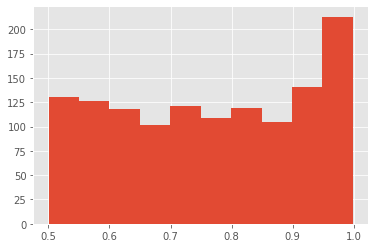

In [372]:
negative_men = BVC2021_men[BVC2021_men.polarity == 'NEGATIVE']['score']

plt.style.use('ggplot')

plt.hist(negative_men)
plt.show()

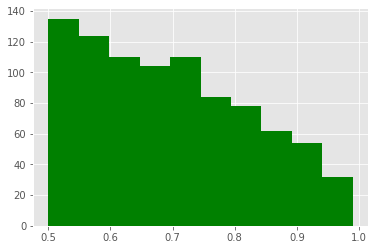

In [385]:
positive_men = BVC2021_men[BVC2021_men.polarity == 'POSITIVE']['score']

plt.hist(positive_men, color='green')
plt.show()

In [381]:
net_men = (BVC2021_men[BVC2021_men.polarity == 'POSITIVE']['score'].sum()-BVC2021_men[BVC2021_men.polarity == 'NEGATIVE']['score'].sum())/len(BVC2021_men.score)
net_men

-0.16587067135003492

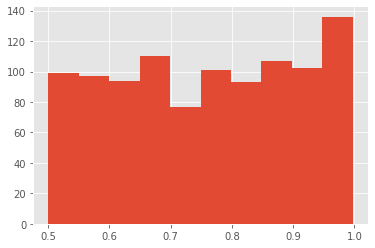

In [373]:
negative_women = BVC2021_women[BVC2021_women.polarity == 'NEGATIVE']['score']

plt.style.use('ggplot')

plt.hist(negative_women)
plt.show()

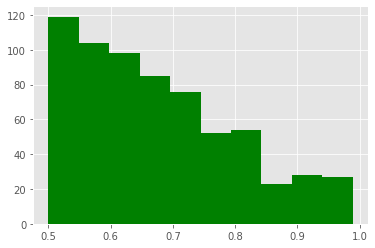

In [386]:
positive_women = BVC2021_women[BVC2021_women.polarity == 'POSITIVE']['score']

plt.hist(positive_women, color='green')
plt.show()

In [382]:
net_women = (BVC2021_women[BVC2021_women.polarity == 'POSITIVE']['score'].sum()-BVC2021_women[BVC2021_women.polarity == 'NEGATIVE']['score'].sum())/len(BVC2021_women.score)
net_women

-0.19006685510401777

In [389]:
BVC2021_women.groupby('polarity')['score'].describe().transpose()

polarity,NEGATIVE,POSITIVE
count,1016.000000,666.000000
mean,0.758422,0.676973
std,0.147487,0.125488
min,0.500431,0.500389
25%,0.630570,0.574656
50%,0.763890,0.653941
75%,0.890695,0.758461
max,0.997240,0.988713


In [390]:
BVC2021_men.groupby('polarity')['score'].describe().transpose()

polarity,NEGATIVE,POSITIVE
count,1284.000000,893.000000
mean,0.765585,0.696429
std,0.153673,0.128479
min,0.500507,0.500628
25%,0.629612,0.582641
50%,0.768544,0.681885
75%,0.909777,0.795660
max,0.998304,0.989669


In [ ]:
#WORDCLOUD



